In [5]:
import numpy as np
import pandas as pd

In [6]:
def sphere(x):
    return np.sum(x ** 2)

## Q3

In [63]:
def one_one_ES(sigma, max_iter, target, n):
    x = np.ones(n) 
    sphere_values = []
    for iteration in range(1, max_iter + 1):
        x_prime = x + np.random.normal(0, sigma, size=n)
        x = x_prime
        sphere_val = sphere(x_prime)
        sphere_values.append(sphere_val)
        
        if sphere_val <= target:
            return iteration, sphere_values
    return max_iter, sphere_values

In [81]:
def one_plus_one_ES(sigma, max_iter, target, n):
    x = np.ones(n) 
    sphere_values = []
    for iteration in range(1, max_iter + 1):
        x_prime = x + np.random.normal(0, sigma, size=n)
        f_x = sphere(x)
        f_x_new = sphere(x_prime)
        
        if f_x_new < f_x:
            x = x_prime
            f_x = f_x_new
        sphere_values.append(f_x)
        if f_x <= target:
            return iteration, sphere_values
    return max_iter, sphere_values

In [96]:
sigmas = [0.01]#, 0.1, 1.0]
n_runs = 1
max_iterations = 10000
target_value = 0.005
n=10

# Collect results
one_one_es_results = {sigma: [] for sigma in sigmas}
one_plus_one_es_results = {sigma: [] for sigma in sigmas}

# Run experiments
for sigma in sigmas:
    for run in range(n_runs):
#         iter1, f = one_one_ES(sigma, max_iterations, target_value, n)
#         one_one_es_results[sigma].append(iter1)
        
        iter2,f = one_plus_one_ES(sigma, max_iterations, target_value, n)
        one_plus_one_es_results[sigma].append(iter2)

# Convert results to DataFrames
# df_one_one_es = pd.DataFrame(one_one_es_results)
# df_one_one_es.columns = [f'σ = {sigma}' for sigma in sigmas]
# df_one_one_es.index = [f'Run #{i+1}' for i in range(n_runs)]

# df_one_plus_one_es = pd.DataFrame(one_plus_one_es_results)
# df_one_plus_one_es.columns = [f'σ = {sigma}' for sigma in sigmas]
# df_one_plus_one_es.index = [f'Run #{i+1}' for i in range(n_runs)]

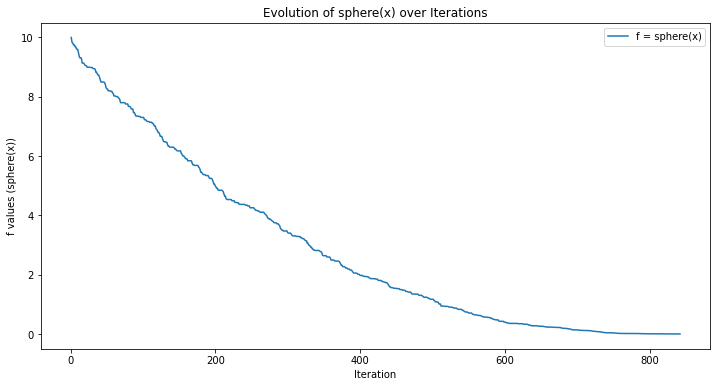

In [97]:
# Plotting f values (sphere function values over iterations)
plt.figure(figsize=(12, 6))
plt.plot(range(1, iter2 + 1), f, label="f = sphere(x)")
plt.xlabel("Iteration")
plt.ylabel("f values (sphere(x))")
plt.title("Evolution of sphere(x) over Iterations")
plt.legend()
plt.show()

In [88]:
f

[10.0,
 10.0,
 10.0,
 9.976961059455542,
 9.976961059455542,
 9.962525863052479,
 9.962525863052479,
 8.517940781660823,
 8.517940781660823,
 8.517940781660823,
 8.517940781660823,
 8.517940781660823,
 8.517940781660823,
 8.517940781660823,
 8.19750028707042,
 8.19750028707042,
 8.19750028707042,
 8.19750028707042,
 8.19750028707042,
 8.19750028707042,
 7.325740536502053,
 7.254692774842174,
 7.074976850025621,
 7.074976850025621,
 6.621674496729091,
 6.621674496729091,
 6.090362640573175,
 6.090362640573175,
 5.959190611215714,
 5.959190611215714,
 5.653933612522155,
 5.601369865925773,
 5.601369865925773,
 5.09828486590589,
 5.09828486590589,
 5.09828486590589,
 5.09828486590589,
 5.0342893630770496,
 4.704274427850534,
 4.704274427850534,
 4.649730780263676,
 4.649730780263676,
 4.649730780263676,
 4.649730780263676,
 4.649730780263676,
 4.649730780263676,
 4.649730780263676,
 4.649730780263676,
 4.434026601273747,
 4.0875779104921754,
 4.0875779104921754,
 4.0875779104921754,
 4.08

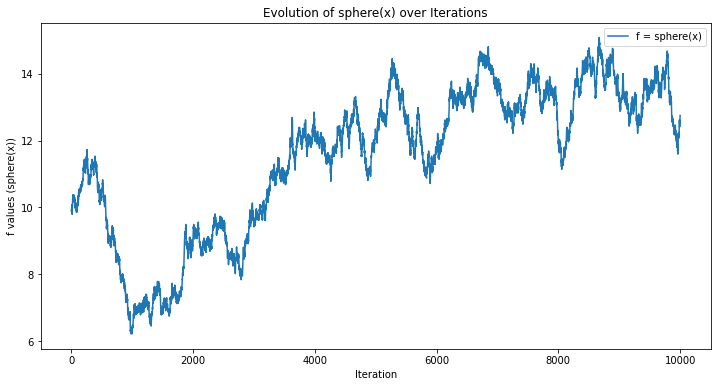

In [70]:
# Plotting f values (sphere function values over iterations)
plt.figure(figsize=(12, 6))
plt.plot(range(1, iter1 + 1), f, label="f = sphere(x)")
plt.xlabel("Iteration")
plt.ylabel("f values (sphere(x))")
plt.title("Evolution of sphere(x) over Iterations")
plt.legend()
plt.show()

In [ ]:
x_prime_magnitudes = [np.linalg.norm(x_prime) for x_prime in x_prime_list]

# Plot x_prime magnitudes over iterations
plt.figure(figsize=(12, 5))

# Plot for x_prime magnitudes
plt.subplot(1, 2, 1)
plt.plot(range(1, iterations + 1), x_prime_magnitudes, label='||x_prime||')
plt.xlabel('Iteration')
plt.ylabel('Magnitude of x_prime')
plt.title('Magnitude of x_prime over Iterations')
plt.grid(True)
plt.legend()

# Plot for sphere values over iterations
plt.subplot(1, 2, 2)
plt.plot(range(1, iterations + 1), sphere_values, label='sphere(x_prime)', color='orange')
plt.xlabel('Iteration')
plt.ylabel('sphere(x_prime)')
plt.title('Sphere Function Value over Iterations')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
print("(1,1)-ES with gaussian mutation:")
print(df_one_one_es)
print("\nResults for (1+1)-ES:")
print(df_one_plus_one_es)

Results for (1,1)-ES:
        σ = 0.01  σ = 0.1  σ = 1.0
Run #1     10000    10000    10000
Run #2     10000    10000    10000
Run #3     10000    10000    10000

Results for (1+1)-ES:
        σ = 0.01  σ = 0.1  σ = 1.0
Run #1       525       68    10000
Run #2       590       80     6058
Run #3       549       64     1575


## Q5

In [35]:
def uncorrelated_mutation(x, sigmas, tau, tau_prime, epsilon_0):
    n = len(x)
    global_factor = np.exp(tau_prime * np.random.normal(0, 1))
    new_sigmas = sigmas * np.exp(tau * np.random.normal(0, 1, n)) * global_factor
    new_sigmas = np.clip(new_sigmas, epsilon_0, 10)
    x_prime = x + new_sigmas * np.random.normal(0, 1, n)
    
    return x_prime, new_sigmas

In [119]:
def one_one_ES_uncorrelated(sigma, max_iter, target, n, epsilon_0, tau, tau_prime):
    x = np.ones(n) 
    sigmas = np.full(n, sigma) 
    sphere_values = []
    sigma_values = []
    for iteration in range(1, max_iter + 1):
        x_prime, sigmas = uncorrelated_mutation(x, sigmas, tau, tau_prime, epsilon_0)
        x = x_prime
        sphere_value = sphere(x)
        sphere_values.append(sphere_value)
        sigma_values.append(sigmas)
        if sphere_value <= target:
            return iteration, sphere_values,sigma_values
    return max_iter, sphere_values,sigma_values

In [100]:
def one_plus_one_ES_uncorrelated(sigma, max_iter, target, n, epsilon_0, tau, tau_prime):
    x = np.ones(n)
    sigmas = np.full(n, sigma)  
    sphere_values = []
    sigma_values = []
    for iteration in range(1, max_iter + 1):
        x_prime, new_sigmas = uncorrelated_mutation(x, sigmas, tau, tau_prime, epsilon_0)
        f_x = sphere(x)
        f_x_new = sphere(x_prime)
       
        if f_x_new < f_x:
            x = x_prime
            f_x = f_x_new
            sigmas = new_sigmas
        sphere_values.append(f_x) 
        sigma_values.append(sigmas)
        if f_x <= target:
            return iteration,sphere_values,sigma_values
    return max_iter,sphere_values,sigma_values

In [121]:
n = 10
sigmas = [0.1]#, 0.1, 1.0]
n_runs = 1
max_iterations = 100000
target_value = 0.005
tau = 1 / np.sqrt(2 * np.sqrt(n))
tau_prime = 1 / np.sqrt(2 * n)
epsilon_0 = 1e-6

# Collect results
one_one_es_uncorr_results = {sigma: [] for sigma in sigmas}
one_plus_one_es_uncorr_results = {sigma: [] for sigma in sigmas}

# Run experiments
for sigma in sigmas:
    print(f"Sigma: {sigma}")
    for run in range(n_runs):        
        print(f"#Run:{run}")
        iter1,f,sig = one_one_ES_uncorrelated(sigma, max_iterations, target_value, n, epsilon_0, tau, tau_prime)
        one_one_es_uncorr_results[sigma].append(iter1)
        print(f"(1,1)ES: {iter1}")
#         iter2,f,sig = one_plus_one_ES_uncorrelated(sigma, max_iterations, target_value, n, epsilon_0, tau, tau_prime)
#         one_plus_one_es_uncorr_results[sigma].append(iter2)
#         print(f"(1+1)ES: {iter2}")
    print("------------------------------")

# # Convert results to DataFrames
# df_one_one_es_uncorr = pd.DataFrame(one_one_es_uncorr_results)
# df_one_one_es_uncorr.columns = [f'σ = {sigma}' for sigma in sigmas]
# df_one_one_es_uncorr.index = [f'Run #{i+1}' for i in range(n_runs)]

# df_one_plus_one_es_uncorr = pd.DataFrame(one_plus_one_es_uncorr_results)
# df_one_plus_one_es_uncorr.columns = [f'σ = {sigma}' for sigma in sigmas]
# df_one_plus_one_es_uncorr.index = [f'Run #{i+1}' for i in range(n_runs)]

Sigma: 0.1
#Run:0
(1,1)ES: 100000
------------------------------


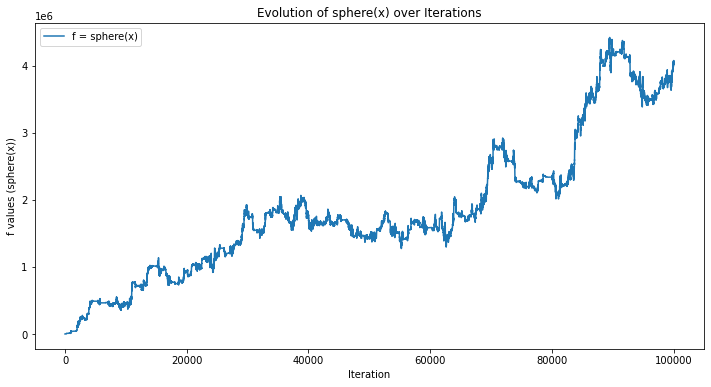

In [122]:
# Plotting f values (sphere function values over iterations)
plt.figure(figsize=(12, 6))
plt.plot(range(1, iter1 + 1), f, label="f = sphere(x)")
plt.xlabel("Iteration")
plt.ylabel("f values (sphere(x))")
plt.title("Evolution of sphere(x) over Iterations")
plt.legend()
plt.show()

In [118]:
f[2000]

2.137147208434213

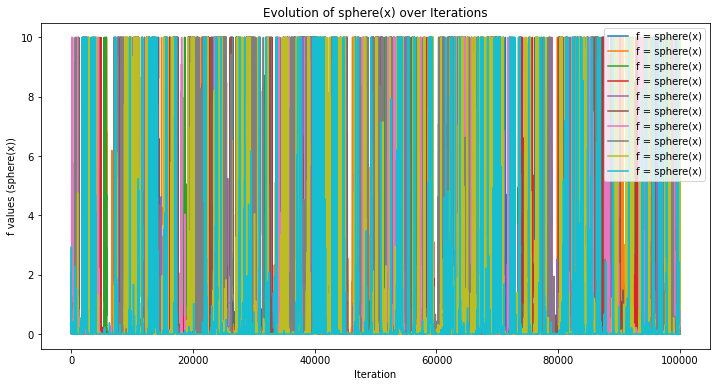

In [123]:
# Plotting f values (sphere function values over iterations)
plt.figure(figsize=(12, 6))
plt.plot(range(1, iter1 + 1), sig, label="f = sphere(x)")
plt.xlabel("Iteration")
plt.ylabel("f values (sphere(x))")
plt.title("Evolution of sphere(x) over Iterations")
plt.legend()
plt.show()

In [44]:
n = 10
sigmas = [0.01, 0.1, 1.0]
n_runs = 10
max_iterations = 10000000
target_value = 0.005
tau = 1 / np.sqrt(2 * np.sqrt(n))
tau_prime = 1 / np.sqrt(2 * n)
epsilon_0 = 1e-6

# Collect results
one_one_es_uncorr_results = {sigma: [] for sigma in sigmas}
one_plus_one_es_uncorr_results = {sigma: [] for sigma in sigmas}

# Run experiments
for sigma in sigmas:
    print(f"Sigma: {sigma}")
    for run in range(n_runs):        
        print(f"#Run:{run}")
        iter1 = one_one_ES_uncorrelated(sigma, max_iterations, target_value, n, epsilon_0, tau, tau_prime)
        one_one_es_uncorr_results[sigma].append(iter1)
        print(f"(1,1)ES: {iter1}")
        iter2 = one_plus_one_ES_uncorrelated(sigma, max_iterations, target_value, n, epsilon_0, tau, tau_prime)
        one_plus_one_es_uncorr_results[sigma].append(iter2)
        print(f"(1+1)ES: {iter2}")
    print("------------------------------")

# Convert results to DataFrames
df_one_one_es_uncorr = pd.DataFrame(one_one_es_uncorr_results)
df_one_one_es_uncorr.columns = [f'σ = {sigma}' for sigma in sigmas]
df_one_one_es_uncorr.index = [f'Run #{i+1}' for i in range(n_runs)]

df_one_plus_one_es_uncorr = pd.DataFrame(one_plus_one_es_uncorr_results)
df_one_plus_one_es_uncorr.columns = [f'σ = {sigma}' for sigma in sigmas]
df_one_plus_one_es_uncorr.index = [f'Run #{i+1}' for i in range(n_runs)]

Sigma: 0.01
#Run:0
(1,1)ES: 10000000
(1+1)ES: 1928
#Run:1
(1,1)ES: 10000000
(1+1)ES: 25953
#Run:2
(1,1)ES: 10000000
(1+1)ES: 4924
#Run:3
(1,1)ES: 10000000
(1+1)ES: 7037
#Run:4
(1,1)ES: 10000000
(1+1)ES: 7497
#Run:5
(1,1)ES: 10000000
(1+1)ES: 2832
#Run:6
(1,1)ES: 10000000
(1+1)ES: 6861
#Run:7
(1,1)ES: 10000000
(1+1)ES: 10204
#Run:8
(1,1)ES: 10000000
(1+1)ES: 9480
#Run:9
(1,1)ES: 10000000
(1+1)ES: 4783
------------------------------
Sigma: 0.1
#Run:0
(1,1)ES: 10000000
(1+1)ES: 1136
#Run:1
(1,1)ES: 10000000
(1+1)ES: 1097
#Run:2
(1,1)ES: 10000000
(1+1)ES: 3122
#Run:3
(1,1)ES: 10000000
(1+1)ES: 4473
#Run:4
(1,1)ES: 10000000
(1+1)ES: 9449
#Run:5
(1,1)ES: 10000000
(1+1)ES: 2006
#Run:6
(1,1)ES: 10000000
(1+1)ES: 10055
#Run:7
(1,1)ES: 10000000
(1+1)ES: 3673
#Run:8
(1,1)ES: 10000000
(1+1)ES: 2988
#Run:9
(1,1)ES: 10000000
(1+1)ES: 2807
------------------------------
Sigma: 1.0
#Run:0
(1,1)ES: 10000000
(1+1)ES: 12084
#Run:1
(1,1)ES: 10000000
(1+1)ES: 7027
#Run:2
(1,1)ES: 10000000
(1+1)ES: 1958
#Ru

In [49]:
# Print results
print("(1,1)-ES with Uncorrelated Mutation:")
print(df_one_one_es_uncorr)
print("\n(1+1)-ES with Uncorrelated Mutation:")
print(df_one_plus_one_es_uncorr)

(1,1)-ES with Uncorrelated Mutation:
         σ = 0.01   σ = 0.1   σ = 1.0
Run #1   10000000  10000000  10000000
Run #2   10000000  10000000  10000000
Run #3   10000000  10000000  10000000
Run #4   10000000  10000000  10000000
Run #5   10000000  10000000  10000000
Run #6   10000000  10000000  10000000
Run #7   10000000  10000000  10000000
Run #8   10000000  10000000  10000000
Run #9   10000000  10000000  10000000
Run #10  10000000  10000000  10000000

(1+1)-ES with Uncorrelated Mutation:
         σ = 0.01  σ = 0.1  σ = 1.0
Run #1       1928     1136    12084
Run #2      25953     1097     7027
Run #3       4924     3122     1958
Run #4       7037     4473     1024
Run #5       7497     9449     1741
Run #6       2832     2006     2179
Run #7       6861    10055     3501
Run #8      10204     3673     2184
Run #9       9480     2988    40831
Run #10      4783     2807     4741


## Q7

In [154]:
import numpy as np
import pandas as pd

# Objective function: n-dimensional sphere model
def sphere(x):
    return np.sum(np.clip(x, -1e10, 1e10) ** 2)

def one_one_ES_1_5_rule(sigma, max_iter, target, G=10, a=0.817):
    n = 10  
    x = np.ones(n) 
    success_count = 0 
    sphere_values = []
    sigma_values = []
    for iteration in range(1, max_iter + 1):
        x_prime = x + sigma * np.random.normal(0, 1, n)
        f_x = sphere(x)
        f_x_new = sphere(x_prime)
        if f_x_new < f_x:
            success_count += 1 
            f_x = f_x_new
        x = x_prime
        
        if iteration % G == 0:
            success_rate = success_count / G
            print(iteration,":",success_rate)
            if success_rate > 0.2:
                sigma /= a  
            elif success_rate < 0.2:
                sigma *= a  
            success_count = 0
        sphere_values.append(f_x) 
        sigma_values.append(sigma)

        if f_x <= target:
            return iteration,sphere_values,sigma_values
    
    return max_iter,sphere_values,sigma_values


def one_plus_one_ES_1_5_rule(sigma, max_iter, target, G=10, a=0.817):
    n = 10 
    x = np.ones(n)  
    success_count = 0  
    sphere_values = []
    sigma_values = []
    for iteration in range(1, max_iter + 1):
        x_prime = x + sigma * np.random.normal(0, 1, n)
        f_x = sphere(x)
        f_x_new = sphere(x_prime)
        if f_x_new < f_x:
            success_count += 1 
            f_x = f_x_new
            x = x_prime

        if iteration % G == 0:
            success_rate = success_count / G
            print(G,":",success_rate)
            if success_rate > 0.2:
                sigma /= a 
            elif success_rate < 0.2:
                sigma *= a  
            success_count = 0
        sphere_values.append(f_x) 
        sigma_values.append(sigma)
        if f_x <= target:
            return iteration,sphere_values,sigma_values
    return max_iter,sphere_values,sigma_values  

In [169]:
# Experiment parameters
sigmas = [1]#, 0.1, 1.0]
n_runs = 1
max_iterations = 100000
target_value = 0.005
G = 7
a = 0.9

# # Collect results
# one_one_es_1_5_results = {sigma: [] for sigma in sigmas}
# one_plus_one_es_1_5_results = {sigma: [] for sigma in sigmas}

# Run experiments
for sigma in sigmas:
    print(f"Sigma: {sigma}")
    for run in range(n_runs):
        print(f"#Run:{run}")
#        iter1, f, sig = one_one_ES_1_5_rule(sigma, max_iterations, target_value, G, a)
#         one_one_es_1_5_results[sigma].append(iter1)
#         print(f"(1,1)ES: {iter1}")
        iter1, f, sig = one_plus_one_ES_1_5_rule(sigma, max_iterations, target_value, G, a)
#         one_plus_one_es_1_5_results[sigma].append(iter2)
# print(f"(1+1)ES: {iter2}")
    print("------------------------------")

# Convert results to DataFrames
# df_one_one_es_1_5 = pd.DataFrame(one_one_es_1_5_results)
# df_one_one_es_1_5.columns = [f'σ = {sigma}' for sigma in sigmas]
# df_one_one_es_1_5.index = [f'Run #{i+1}' for i in range(n_runs)]

# df_one_plus_one_es_1_5 = pd.DataFrame(one_plus_one_es_1_5_results)
# df_one_plus_one_es_1_5.columns = [f'σ = {sigma}' for sigma in sigmas]
# df_one_plus_one_es_1_5.index = [f'Run #{i+1}' for i in range(n_runs)]

Sigma: 1
#Run:0
7 : 0.0
7 : 0.0
7 : 0.0
7 : 0.0
7 : 0.14285714285714285
7 : 0.14285714285714285
7 : 0.0
7 : 0.14285714285714285
7 : 0.0
7 : 0.0
7 : 0.0
7 : 0.0
7 : 0.0
7 : 0.2857142857142857
7 : 0.14285714285714285
7 : 0.42857142857142855
7 : 0.14285714285714285
7 : 0.14285714285714285
7 : 0.0
7 : 0.0
7 : 0.14285714285714285
7 : 0.2857142857142857
7 : 0.0
7 : 0.0
7 : 0.0
7 : 0.0
7 : 0.0
7 : 0.14285714285714285
7 : 0.14285714285714285
7 : 0.0
7 : 0.14285714285714285
7 : 0.2857142857142857
7 : 0.0
7 : 0.0
7 : 0.14285714285714285
7 : 0.14285714285714285
7 : 0.14285714285714285
7 : 0.0
7 : 0.14285714285714285
7 : 0.14285714285714285
7 : 0.14285714285714285
7 : 0.0
7 : 0.2857142857142857
7 : 0.0
7 : 0.14285714285714285
7 : 0.14285714285714285
7 : 0.5714285714285714
7 : 0.0
7 : 0.0
7 : 0.0
7 : 0.14285714285714285
------------------------------


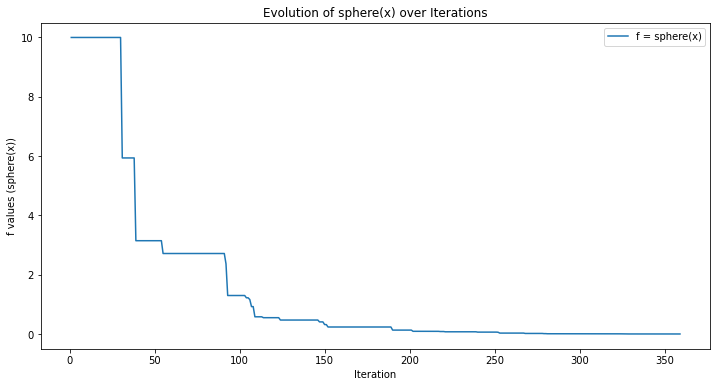

In [170]:
# Plotting f values (sphere function values over iterations)
plt.figure(figsize=(12, 6))
plt.plot(range(1, iter1 + 1), f, label="f = sphere(x)")
plt.xlabel("Iteration")
plt.ylabel("f values (sphere(x))")
plt.title("Evolution of sphere(x) over Iterations")
plt.legend()
plt.show()

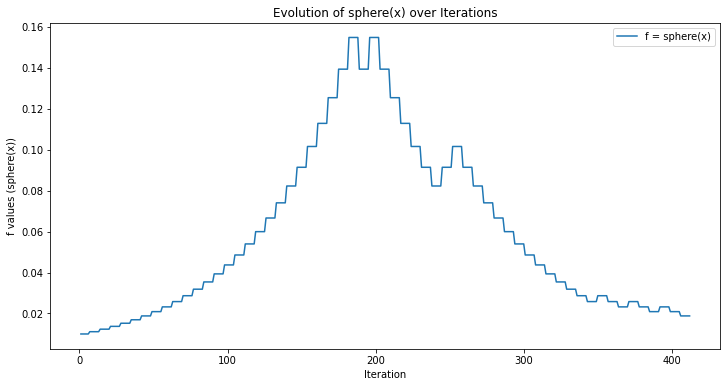

In [168]:
# Plotting f values (sphere function values over iterations)
plt.figure(figsize=(12, 6))
plt.plot(range(1, iter1 + 1), sig, label="f = sphere(x)")
plt.xlabel("Iteration")
plt.ylabel("f values (sphere(x))")
plt.title("Evolution of sphere(x) over Iterations")
plt.legend()
plt.show()

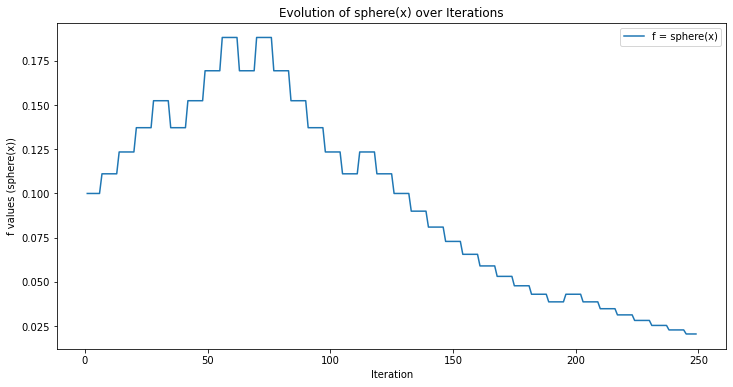

In [165]:
# Plotting f values (sphere function values over iterations)
plt.figure(figsize=(12, 6))
plt.plot(range(1, iter1 + 1), sig, label="f = sphere(x)")
plt.xlabel("Iteration")
plt.ylabel("f values (sphere(x))")
plt.title("Evolution of sphere(x) over Iterations")
plt.legend()
plt.show()

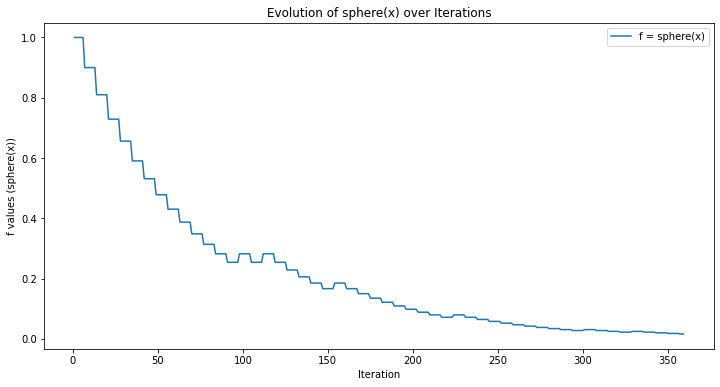

In [171]:
# Plotting f values (sphere function values over iterations)
plt.figure(figsize=(12, 6))
plt.plot(range(1, iter1 + 1), sig, label="f = sphere(x)")
plt.xlabel("Iteration")
plt.ylabel("f values (sphere(x))")
plt.title("Evolution of sphere(x) over Iterations")
plt.legend()
plt.show()

In [52]:
# Experiment parameters
sigmas = [0.01, 0.1, 1.0]
n_runs = 10
max_iterations = 10000000
target_value = 0.005
G = 7
a = 0.817

# Collect results
one_one_es_1_5_results = {sigma: [] for sigma in sigmas}
one_plus_one_es_1_5_results = {sigma: [] for sigma in sigmas}

# Run experiments
for sigma in sigmas:
    print(f"Sigma: {sigma}")
    for run in range(n_runs):
        print(f"#Run:{run}")
#         iter1 = one_one_ES_1_5_rule(sigma, max_iterations, target_value, G, a)
#         one_one_es_1_5_results[sigma].append(iter1)
#         print(f"(1,1)ES: {iter1}")
        iter2 = one_plus_one_ES_1_5_rule(sigma, max_iterations, target_value, G, a)
        one_plus_one_es_1_5_results[sigma].append(iter2)
        print(f"(1+1)ES: {iter2}")
    print("------------------------------")

# Convert results to DataFrames
# df_one_one_es_1_5 = pd.DataFrame(one_one_es_1_5_results)
# df_one_one_es_1_5.columns = [f'σ = {sigma}' for sigma in sigmas]
# df_one_one_es_1_5.index = [f'Run #{i+1}' for i in range(n_runs)]

df_one_plus_one_es_1_5 = pd.DataFrame(one_plus_one_es_1_5_results)
df_one_plus_one_es_1_5.columns = [f'σ = {sigma}' for sigma in sigmas]
df_one_plus_one_es_1_5.index = [f'Run #{i+1}' for i in range(n_runs)]

Sigma: 0.01
#Run:0
(1+1)ES: 333
#Run:1
(1+1)ES: 379
#Run:2
(1+1)ES: 318
#Run:3
(1+1)ES: 289
#Run:4
(1+1)ES: 308
#Run:5
(1+1)ES: 343
#Run:6
(1+1)ES: 274
#Run:7
(1+1)ES: 317
#Run:8
(1+1)ES: 251
#Run:9
(1+1)ES: 372
------------------------------
Sigma: 0.1
#Run:0
(1+1)ES: 213
#Run:1
(1+1)ES: 218
#Run:2
(1+1)ES: 244
#Run:3
(1+1)ES: 242
#Run:4
(1+1)ES: 197
#Run:5
(1+1)ES: 272
#Run:6
(1+1)ES: 252
#Run:7
(1+1)ES: 271
#Run:8
(1+1)ES: 332
#Run:9
(1+1)ES: 239
------------------------------
Sigma: 1.0
#Run:0
(1+1)ES: 274
#Run:1
(1+1)ES: 278
#Run:2
(1+1)ES: 267
#Run:3
(1+1)ES: 260
#Run:4
(1+1)ES: 246
#Run:5
(1+1)ES: 267
#Run:6
(1+1)ES: 230
#Run:7
(1+1)ES: 234
#Run:8
(1+1)ES: 306
#Run:9
(1+1)ES: 297
------------------------------


In [126]:
print("Results for (1,1)-ES with 1/5-Rule:")
print(df_one_one_es_uncorr)
print("\nResults for (1+1)-ES with 1/5-Rule:")
print(df_one_plus_one_es_1_5)

Results for (1,1)-ES with 1/5-Rule:
         σ = 0.01   σ = 0.1   σ = 1.0
Run #1   10000000  10000000  10000000
Run #2   10000000  10000000  10000000
Run #3   10000000  10000000  10000000
Run #4   10000000  10000000  10000000
Run #5   10000000  10000000  10000000
Run #6   10000000  10000000  10000000
Run #7   10000000  10000000  10000000
Run #8   10000000  10000000  10000000
Run #9   10000000  10000000  10000000
Run #10  10000000  10000000  10000000

Results for (1+1)-ES with 1/5-Rule:
         σ = 0.01  σ = 0.1  σ = 1.0
Run #1        333      213      274
Run #2        379      218      278
Run #3        318      244      267
Run #4        289      242      260
Run #5        308      197      246
Run #6        343      272      267
Run #7        274      252      230
Run #8        317      271      234
Run #9        251      332      306
Run #10       372      239      297


In [53]:
print("\nResults for (1+1)-ES with 1/5-Rule:")
print(df_one_plus_one_es_1_5)


Results for (1+1)-ES with 1/5-Rule:
         σ = 0.01  σ = 0.1  σ = 1.0
Run #1        333      213      274
Run #2        379      218      278
Run #3        318      244      267
Run #4        289      242      260
Run #5        308      197      246
Run #6        343      272      267
Run #7        274      252      230
Run #8        317      271      234
Run #9        251      332      306
Run #10       372      239      297
